<a href="https://colab.research.google.com/github/srinijalanda93/SPR_LAB/blob/main/2448526_LAB8_SPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This program implements a Hidden Markov Model (HMM) to simulate phoneme transitions for the word "speech" using predefined transition and emission probabilities.
### It generates a valid sequence of phonemes starting from /s/ and produces corresponding acoustic observations (energy, pitch, duration).
Finally, it demonstrates how HMMs model hidden states in speech processing.

##  Initial probabilities for starting phonemes
--> Transition probability matrix for phoneme-to-phoneme transitions
--> Emission probability matrix for acoustic observations
These are stored using Python dictionaries for easy readability

3 DEFINE HMM PARAMETERS

In [1]:


import numpy as np
import random

# Hidden states (phonemes)
states = ['/s/', '/p/', '/ie:/', '/tS/']

# Observations
observations = ['Energy', 'Pitch', 'Duration']

# Initial probability: starting always at phoneme /s/
initial_prob = {
    '/s/': 1.0,
    '/p/': 0.0,
    '/ie:/': 0.0,
    '/tS/': 0.0
}

# Transition Probability Matrix
transition_prob = {
    '/s/':  {'/s/': 0.0, '/p/': 0.8, '/ie:/': 0.1, '/tS/': 0.1},
    '/p/':  {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.9, '/tS/': 0.1},
    '/ie:/':{'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 1.0},
    '/tS/': {'/s/': 1.0, '/p/': 0.0, '/ie:/': 0.0, '/tS/': 0.0}
}

# Emission Probability Matrix
emission_prob = {
    '/s/':  {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/':  {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/':{'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tS/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2}
}

print("HMM Parameters Loaded Successfully!")


HMM Parameters Loaded Successfully!


# Display Matrices Neatly
Explanation: functions to neatly print the transition matrix, emission matrix, and initial probabilities in a tabular format.

# DISPLAY TRANSITION & EMISSION MATRICES

In [2]:


def display_initial_prob():
    print("\nInitial Probabilities:")
    for s, p in initial_prob.items():
        print(f"{s}: {p}")

def display_transition_matrix():
    print("\nTransition Probability Matrix:")
    print("From → To")
    print(f"{'State':8} | " + " | ".join(f"{st:6}" for st in states))
    print("-" * 50)
    for s in states:
        row = " | ".join(f"{transition_prob[s][st]:.2f}" for st in states)
        print(f"{s:8} | {row}")

def display_emission_matrix():
    print("\nEmission Probability Matrix:")
    print("Phoneme → Observation")
    print(f"{'State':8} | " + " | ".join(f"{obs:8}" for obs in observations))
    print("-" * 50)
    for s in states:
        row = " | ".join(f"{emission_prob[s][obs]:.2f}" for obs in observations)
        print(f"{s:8} | {row}")

display_initial_prob()
display_transition_matrix()
display_emission_matrix()



Initial Probabilities:
/s/: 1.0
/p/: 0.0
/ie:/: 0.0
/tS/: 0.0

Transition Probability Matrix:
From → To
State    | /s/    | /p/    | /ie:/  | /tS/  
--------------------------------------------------
/s/      | 0.00 | 0.80 | 0.10 | 0.10
/p/      | 0.00 | 0.00 | 0.90 | 0.10
/ie:/    | 0.00 | 0.00 | 0.00 | 1.00
/tS/     | 1.00 | 0.00 | 0.00 | 0.00

Emission Probability Matrix:
Phoneme → Observation
State    | Energy   | Pitch    | Duration
--------------------------------------------------
/s/      | 0.70 | 0.20 | 0.10
/p/      | 0.50 | 0.30 | 0.20
/ie:/    | 0.30 | 0.50 | 0.20
/tS/     | 0.40 | 0.40 | 0.20


## Generate Phoneme & Observation Sequence
 randomly samples phonemes using transition probabilities.
For each selected phoneme, it also randomly emits an acoustic feature using emission probabilities.

# GENERATE PHONEME & OBSERVATION SEQUENCE

In [3]:


def sample_state(prob_dict):
    """Randomly select a state from a probability dictionary."""
    states_list = list(prob_dict.keys())
    probs = list(prob_dict.values())
    return random.choices(states_list, weights=probs, k=1)[0]

def generate_sequence(length=4):
    phoneme_sequence = []
    observation_sequence = []

    # Start at /s/
    current_state = '/s/'
    phoneme_sequence.append(current_state)

    # Emit observation
    obs = sample_state(emission_prob[current_state])
    observation_sequence.append(obs)

    # Generate remaining phonemes
    for _ in range(length - 1):
        current_state = sample_state(transition_prob[current_state])
        phoneme_sequence.append(current_state)

        obs = sample_state(emission_prob[current_state])
        observation_sequence.append(obs)

    return phoneme_sequence, observation_sequence

phonemes, obs_seq = generate_sequence()

print("\nGenerated Phoneme Sequence:", phonemes)
print("Generated Observation Sequence:", obs_seq)



Generated Phoneme Sequence: ['/s/', '/tS/', '/s/', '/p/']
Generated Observation Sequence: ['Pitch', 'Pitch', 'Energy', 'Pitch']


##  prints a short inference describing what the HMM simulation demonstrates.

In [4]:


print("\nInference:")
print("""
The HMM successfully models how phonemes in the word 'speech' transition based
on predefined probabilities. Each phoneme produces an observable acoustic feature
(energy, pitch, or duration), demonstrating how hidden states generate measurable signals.
""")



Inference:

The HMM successfully models how phonemes in the word 'speech' transition based 
on predefined probabilities. Each phoneme produces an observable acoustic feature 
(energy, pitch, or duration), demonstrating how hidden states generate measurable signals.



#  GRAPHICAL VISUALIZATION OF HMM TRANSITIONS

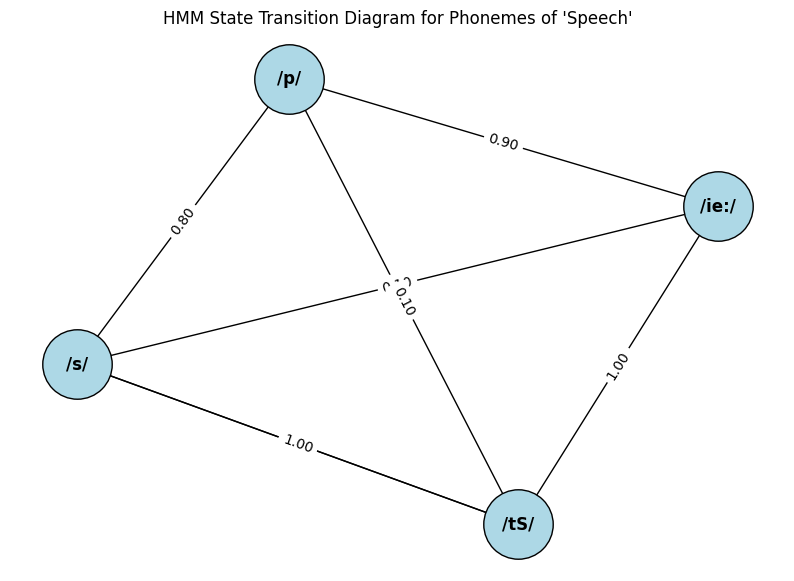

In [5]:



import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (phonemes)
for state in states:
    G.add_node(state)

# Add edges with transition probabilities
for s1 in states:
    for s2 in states:
        prob = transition_prob[s1][s2]
        if prob > 0:      # Only draw edges with non-zero probability
            G.add_edge(s1, s2, weight=prob, label=str(prob))

# Set layout for visualization
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

plt.figure(figsize=(10, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color="#ADD8E6", edgecolors="black")

# Draw edges
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

# Draw labels on nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Draw edge labels (transition probabilities)
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("HMM State Transition Diagram for Phonemes of 'Speech'")
plt.axis("off")
plt.show()
